In [43]:
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)
%matplotlib inline

In [44]:
# crop if needed
def center_crop(image_path, size):
  """
  crop the image from center of the given size
  input:
    image_path (string): Path of image
    size (int): size to which the image being cropped from center
  """
  img = Image.open(image_path)
  img = img.resize((size+1,size+1))
  x_center = img.width/2
  y_center = img.height/2
  size = size/2
  cr = img.crop((x_center-size, y_center-size, x_center+size, y_center+size))

  return cr

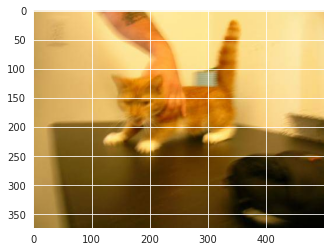

In [45]:
img = Image.open("Cat_Dog_data/train/cat/cat.0.jpg")
img.format, type(img)
plt.imshow(img)

In [46]:
# get cat and dog list
cat_list = os.listdir("Cat_Dog_data/train/cat")
dog_list = os.listdir("Cat_Dog_data/train/dog")

# shorten them if needed
shortTrainNum = 1000
cat_list = cat_list[:shortTrainNum]
dog_list = dog_list[:shortTrainNum]

# make training list, combine them, and shuffle them
train_list = []
train_list.extend(cat_list)
train_list.extend(dog_list)
np.random.shuffle(train_list)

In [48]:

# create 100*100 array
train_data = np.zeros(((len(train_list)), 100 * 100 * 3))

# crop image, flatten, and store
for i, image_name in enumerate(train_list):
  if image_name.split(".")[0] == "dog":
    path =  "Cat_Dog_data/train/dog"
  else:
    path =  "Cat_Dog_data/train/cat"
  image_path = f'{path}/{image_name}'
  crp_img = center_crop(image_path,100)
  crp_arr = np.array(crp_img).reshape(-1)
  train_data[i] = crp_arr

In [49]:
# check if successful
# normalize between 0-1
train_data = train_data/255
train_data[100]

array([0.05098039, 0.05098039, 0.04313725, ..., 0.09411765, 0.03137255,
       0.03529412])

In [50]:
# get labels and store
# cat: 0
# dog: 1

train_labels = np.array([0 if name.split(".")[0]=="cat" else 1 for name in train_list])

In [57]:
# use sklearn to grab log reg model

model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(train_data, train_labels)
model.score(train_data, train_labels)

1.0

array([1])

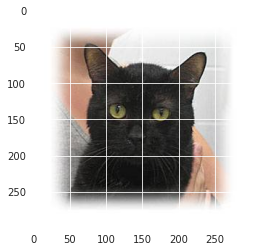

In [58]:
# do a prediction

test_img = "Cat_Dog_data/test/cat/cat.10038.jpg"
img = Image.open(test_img)
plt.imshow(img)

im = center_crop(test_img,100) # cropping image
X = np.array(im).reshape(-1) # flattening the image to pass in model for prediction
X = X/255 # scale the pixels in 0-1 range

model.predict([X])

In [59]:
# analyze results

train_pred = model.predict(train_data)
cm = confusion_matrix(train_pred, train_labels)
cm

array([[1000,    0],
       [   0, 1000]])

<AxesSubplot:>

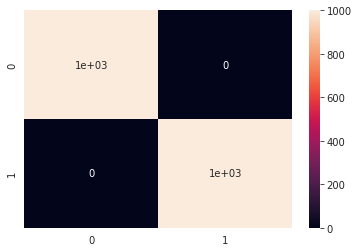

In [60]:
sns.heatmap(cm, annot=True)

In [61]:
# work on unseen data
test_data_cat = os.listdir("Cat_Dog_data/test/cat")
test_data_dog = os.listdir("Cat_Dog_data/test/dog")
test_data_cat = test_data_cat[:200]
test_data_dog = test_data_dog[:200]
test_list = []
test_list.extend(test_data_cat)
test_list.extend(test_data_dog)

len(test_list)

400

In [62]:
test_data = np.zeros((400,100*100*3))

for i, image_name in enumerate(test_list):
  if image_name.split(".")[0] == "dog":
    path =  "Cat_Dog_data/test/dog"
  else:
    path =  "Cat_Dog_data/test/cat"
  image_path = f'{path}/{image_name}'
  crp_img = center_crop(image_path,100)
  crp_arr = np.array(crp_img).reshape(-1)
  test_data[i] = crp_arr

  test_data = test_data/255

  test_labels = np.array([0 if name.split(".")[0]=="cat" else 1 for name in test_list])

[[200 200]
 [  0   0]]
Accuracy on test set:  0.5


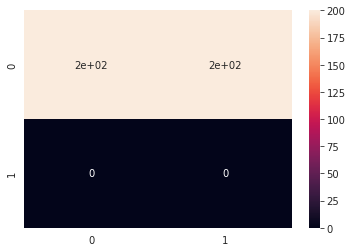

In [56]:
# analyze results
pred = model.predict(test_data)
cm = confusion_matrix(pred, test_labels)
print(cm)
sns.heatmap(cm, annot=True)

test_acc = model.score(test_data, test_labels)
print("Accuracy on test set: ", test_acc)